In [3]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [4]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [5]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [6]:
sample_sizes = [5423]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/Output/mcm/sample_sizes")
atest_mcms, atest_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [7]:
# atest_mcms.shape, np.mean(atest_probs, axis=2)[:,0].shape, atest_probs[:,0,0].shape
# test_probs = np.mean(atest_probs, axis=2)[:,0]


In [8]:
test_mcms = atest_mcms[:,0,0]
test_probs = atest_probs[:,0,0]
test_mcms.shape,test_probs.shape

((10, 10, 121), (10, 10, 121, 892))

In [9]:
# test_probs[0,0,:,0]
# full_mcm_idx = [np.where(test_probs[mcm_i,0,:,0] == -1,)[0][0]-1 for mcm_i in range(10)]
# test_probs.shape

In [10]:

per_image_prob = np.product(test_probs,axis=2,where=test_probs!=-1) # this correct be cause get_complete_testprobs gives the probability for each icc

In [11]:
# digitwise accuracy
max_decision_unit = np.argmax(per_image_prob,axis=0) # out of the 10 mcm seeing the same digit, which one was the most probable
digit_accu = [1-np.count_nonzero(max_decision_unit[k,:] - k)/892 for k in range(10)]
np.vstack((np.arange(10), digit_accu)).T, np.mean(digit_accu)
# np.mean(digit_accu)  
# digit_accu

(array([[0.        , 0.97309417],
        [1.        , 0.97757848],
        [2.        , 0.94955157],
        [3.        , 0.9293722 ],
        [4.        , 0.92264574],
        [5.        , 0.92040359],
        [6.        , 0.94506726],
        [7.        , 0.90470852],
        [8.        , 0.88789238],
        [9.        , 0.89573991]]),
 0.9306053811659194)

In [12]:
# predicted_labels_per_image
# unqs
def mean_test_acc(test_probs):
    per_image_prob = np.product(test_probs,axis=2,where=test_probs!=-1) # this correct be cause get_complete_testprobs gives the probability for each icc
    max_decision_unit = np.argmax(per_image_prob,axis=0) # out of the 10 mcm seeing the same digit, which one was the most probable
    digit_accu = [1-np.count_nonzero(max_decision_unit[k,:] - k)/892 for k in range(10)]
    return np.mean(digit_accu)
mean_test_acc(test_probs)

0.9306053811659194

In [13]:
# for every set of testimages, compute 

# the most likely label the NB classifier gave to each image (10, 892)
predicted_labels_per_image = np.argmax(per_image_prob,axis=0)

# np.unique(arr, return_counts=True)
v, c = np.unique(predicted_labels_per_image, return_counts=True,axis=1)
# list of tuples: each tuple is each wrong label:count how often each label
unqs = [np.unique(arr, return_counts=True) for arr in predicted_labels_per_image]

idx_arr = np.zeros((10,10))
for i in range(10):
    idx_arr[i][unqs[i][0]] = unqs[i][1]

idx_arr /= 982

#
np.fill_diagonal(idx_arr, 0)
# np.fill_diagonal(idx_arr,idx_arr.max())
np.mean((1-idx_arr[3][5], 1-idx_arr[5][3]))
# 1-idx_arr

# unqs[i][0]

0.9714867617107943

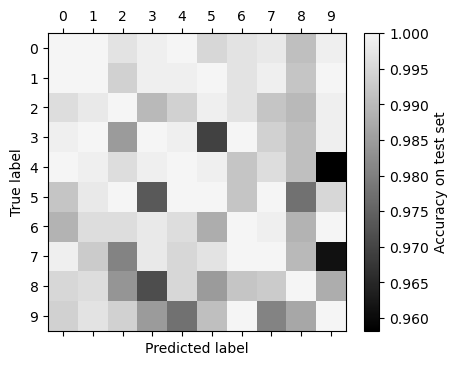

In [14]:

im = myplot.plot_confusion_matrix(1-idx_arr,10,logScale=False,cmap=myplot.cmap_to_gray("black",reverse=False), title="")#,title="Confusion matrix:\n MCM(n=5423) on test set")
plt.colorbar(im,shrink=.8).set_label("Accuracy on test set")
plt.savefig("./img/confusion_testacc.png",dpi=300, bbox_inches="tight")

### Mean test accuracy over N

In [15]:

sample_sizes_all = list(np.arange(100,5400,100)) + [5423]

In [16]:
# # call multiple times to not run out of memory

# out = list()
# for i, ss in enumerate(sample_sizes_all):
#     print(ss)

#     counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm([ss], letter="", path_format="../data/Output/mcm/sample_sizes")
#     atest_mcms, atest_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)
#     out.append(mean_test_acc(atest_probs[:,0,0]))
#     print(ss)

100
100
200
200
300
300
400
400
500
500
600
600
700
700
800
800
900
900
1000
1000
1100
1100
1200
1200
1300
1300
1400
1400
1500
1500
1600
1600
1700
1700
1800
1800
1900
1900
2000
2000
2100
2100
2200
2200
2300
2300
2400
2400
2500
2500
2600
2600
2700
2700
2800
2800
2900
2900
3000
3000
3100
3100
3200
3200
3300
3300
3400
3400
3500
3500
3600
3600
3700
3700
3800
3800
3900
3900
4000
4000
4100
4100
4200
4200
4300
4300
4400
4400
4500
4500
4600
4600
4700
4700
4800
4800
4900
4900
5000
5000
5100
5100
5200
5200
5300
5300
5423
5423


In [17]:
import os

# Get the current directory
current_dir = os.getcwd()

# Create the file path
file_path = os.path.join(current_dir, "test_accuracies_over_sample_sizes.txt")

# Open the file in write mode
with open(file_path, "w") as file:
    # Write the list "out" to the file
    for item in out:
        file.write(str(item) + "\n")

In [18]:
import numpy as np

file_path = '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/test_accuracies_over_sample_sizes.txt'
data = np.loadtxt(file_path)

print(data)

[0.66423767 0.64461883 0.73284753 0.73251121 0.73508969 0.71121076
 0.69237668 0.74596413 0.72197309 0.78150224 0.78789238 0.84887892
 0.78856502 0.78419283 0.87275785 0.87769058 0.87847534 0.84450673
 0.8970852  0.89091928 0.91625561 0.88508969 0.89383408 0.90852018
 0.88991031 0.90919283 0.89966368 0.91289238 0.91076233 0.91199552
 0.91704036 0.91535874 0.91210762 0.91894619 0.92017937 0.91883408
 0.91793722 0.92365471 0.92443946 0.92331839 0.92298206 0.92869955
 0.92174888 0.92443946 0.92488789 0.92881166 0.92735426 0.92567265
 0.92589686 0.92982063 0.92612108 0.93038117 0.9264574  0.93060538]


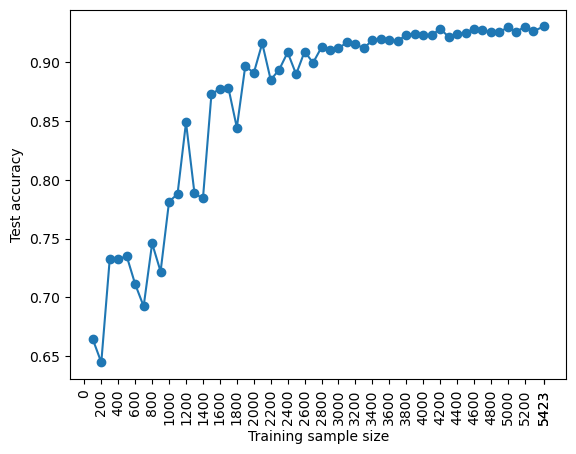

In [34]:
import matplotlib.pyplot as plt

# Create the plot
plt.plot(sample_sizes_all, data, marker='o')

# Set the x-axis labels
plt.xticks(sample_sizes_all, rotation=90)

# Set the axis labels and title
plt.xlabel('Training sample size')
plt.ylabel('Test accuracy')
plt.xticks([0]+sample_sizes_all[1::2] + [5423], rotation=90)

# Show the plot
plt.savefig("./img/test_accuracies_overN.png", dpi=300, bbox_inches="tight")